In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier 

In [10]:
data = pd.read_csv('custom.csv')
data.head()
data1 = load_iris()
data1 = pd.DataFrame(data1.data, columns=data1.feature_names)
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_data = load_iris()

X = iris_data.data
Y = iris_data.target
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
def KNN(X_train, Y_train, X_test, k):
    Y_pred = []
    for sample in X_test:
        distances = [np.linalg.norm(np.array(sample) - np.array(X_train_sample)) for X_train_sample in X_train]
        votes = np.argsort(distances)[:k]
        vote_class = [Y_train[i] for i in votes]
        vote_result = Counter(vote_class).most_common()[0][0]
        Y_pred.append(vote_result)
    return np.array(Y_pred)

In [16]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train1, Y_train1)
KNN_pred = KNN.predict(X_test1)

In [19]:
Y_pred = KNN(X_train= X_train1, Y_train= Y_train1, X_test=X_test1, k=3)

In [ ]:
accuracy = accuracy_score(Y_test1, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
f1_score = f1_score(Y_test1, Y_pred, average= None)
for i, f1 in enumerate(f1_score):
    print(f"F1 Score for class {i}: {f1:.2f}")

TypeError: 'numpy.float64' object is not callable

In [ ]:
cl_rpt = classification_report(Y_test1, Y_pred)
print(cl_rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



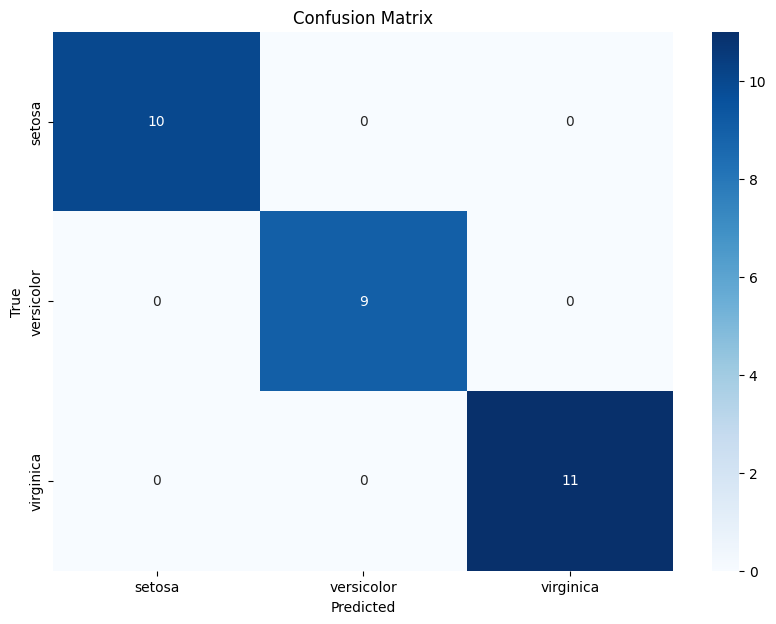

In [ ]:
conf_matrix = confusion_matrix(Y_test1, Y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(data=conf_matrix, annot=True, cmap='Blues', yticklabels=iris_data.target_names, xticklabels=iris_data.target_names, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


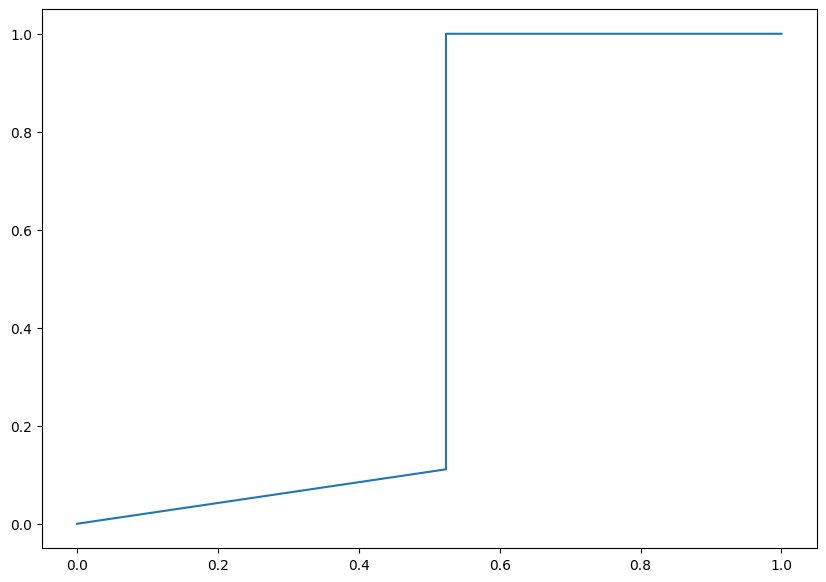

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test1, Y_pred, pos_label=1)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % accuracy)
plt.show()